In [35]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import random
import pickle
import pandas as pd
import tensorflow as tf
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score, recall_score, f1_score

In [5]:
# Getting path of folders and their images
path_to_images = "C:\Desktop\major\Dataset"

img_folders = []
for entry in os.scandir(path_to_images):
    if entry.is_dir():
        img_folders.append(entry.path)
img_folders



['C:\\Desktop\\major\\Dataset\\Mild_Demented',
 'C:\\Desktop\\major\\Dataset\\Moderate_Demented',
 'C:\\Desktop\\major\\Dataset\\Non_Demented',
 'C:\\Desktop\\major\\Dataset\\Very_Mild_Demented']

In [6]:
# Creating a dictionary of images and their labels from each folder path

img_dict = {}
for folder in img_folders:
    img_dict[folder] = []
    for entry in os.scandir(folder):
        if entry.is_file():
            img_dict[folder].append(entry.path)
img_dict

{'C:\\Desktop\\major\\Dataset\\Mild_Demented': ['C:\\Desktop\\major\\Dataset\\Mild_Demented\\mild.jpg',
  'C:\\Desktop\\major\\Dataset\\Mild_Demented\\mild_10.jpg',
  'C:\\Desktop\\major\\Dataset\\Mild_Demented\\mild_100.jpg',
  'C:\\Desktop\\major\\Dataset\\Mild_Demented\\mild_101.jpg',
  'C:\\Desktop\\major\\Dataset\\Mild_Demented\\mild_102.jpg',
  'C:\\Desktop\\major\\Dataset\\Mild_Demented\\mild_103.jpg',
  'C:\\Desktop\\major\\Dataset\\Mild_Demented\\mild_104.jpg',
  'C:\\Desktop\\major\\Dataset\\Mild_Demented\\mild_105.jpg',
  'C:\\Desktop\\major\\Dataset\\Mild_Demented\\mild_106.jpg',
  'C:\\Desktop\\major\\Dataset\\Mild_Demented\\mild_107.jpg',
  'C:\\Desktop\\major\\Dataset\\Mild_Demented\\mild_108.jpg',
  'C:\\Desktop\\major\\Dataset\\Mild_Demented\\mild_109.jpg',
  'C:\\Desktop\\major\\Dataset\\Mild_Demented\\mild_11.jpg',
  'C:\\Desktop\\major\\Dataset\\Mild_Demented\\mild_110.jpg',
  'C:\\Desktop\\major\\Dataset\\Mild_Demented\\mild_111.jpg',
  'C:\\Desktop\\major\\Dataset

In [7]:
# Creating a dataframe of images and their labels

img_df = pd.DataFrame(columns=["image", "label"])
for folder in img_dict:
    for img in img_dict[folder]:
        img_df = pd.concat([img_df, pd.DataFrame([[img, folder.split("\\")[-1]]], columns=["image","label"])])
img_df

,image,label
0,C:\Desktop\major\Dataset\Mild_Demented\mild.jpg,Mild_Demented
0,C:\Desktop\major\Dataset\Mild_Demented\mild_10...,Mild_Demented
0,C:\Desktop\major\Dataset\Mild_Demented\mild_10...,Mild_Demented
0,C:\Desktop\major\Dataset\Mild_Demented\mild_10...,Mild_Demented
0,C:\Desktop\major\Dataset\Mild_Demented\mild_10...,Mild_Demented
...,...,...
0,C:\Desktop\major\Dataset\Very_Mild_Demented\ve...,Very_Mild_Demented
0,C:\Desktop\major\Dataset\Very_Mild_Demented\ve...,Very_Mild_Demented
0,C:\Desktop\major\Dataset\Very_Mild_Demented\ve...,Very_Mild_Demented
0,C:\Desktop\major\Dataset\Very_Mild_Demented\ve...,Very_Mild_Demented


In [8]:
# Shuffling the dataframe

img_df = shuffle(img_df)
img_df

,image,label
0,C:\Desktop\major\Dataset\Non_Demented\non_2927...,Non_Demented
0,C:\Desktop\major\Dataset\Non_Demented\non_2974...,Non_Demented
0,C:\Desktop\major\Dataset\Non_Demented\non_1434...,Non_Demented
0,C:\Desktop\major\Dataset\Non_Demented\non_1319...,Non_Demented
0,C:\Desktop\major\Dataset\Non_Demented\non_1771...,Non_Demented
...,...,...
0,C:\Desktop\major\Dataset\Non_Demented\non_1044...,Non_Demented
0,C:\Desktop\major\Dataset\Very_Mild_Demented\ve...,Very_Mild_Demented
0,C:\Desktop\major\Dataset\Non_Demented\non_752.jpg,Non_Demented
0,C:\Desktop\major\Dataset\Non_Demented\non_431.jpg,Non_Demented


In [9]:
#Encoding the labels

encode_map = {"Non_Demented" : 0, "Very_Mild_Demented" : 1, "Mild_Demented" : 2, "Moderate_Demented" : 3}
img_df["label"] = img_df["label"].map(encode_map)
img_df

,image,label
0,C:\Desktop\major\Dataset\Non_Demented\non_2927...,0
0,C:\Desktop\major\Dataset\Non_Demented\non_2974...,0
0,C:\Desktop\major\Dataset\Non_Demented\non_1434...,0
0,C:\Desktop\major\Dataset\Non_Demented\non_1319...,0
0,C:\Desktop\major\Dataset\Non_Demented\non_1771...,0
...,...,...
0,C:\Desktop\major\Dataset\Non_Demented\non_1044...,0
0,C:\Desktop\major\Dataset\Very_Mild_Demented\ve...,1
0,C:\Desktop\major\Dataset\Non_Demented\non_752.jpg,0
0,C:\Desktop\major\Dataset\Non_Demented\non_431.jpg,0


In [10]:
# Creating X and y by reading images and their labels

X = []
y = []

for img_path, label in zip(img_df["image"].values, img_df["label"].values):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (224, 224))
    X.append(img)
    y.append(label)
X = np.array(X)
y = np.array(y)

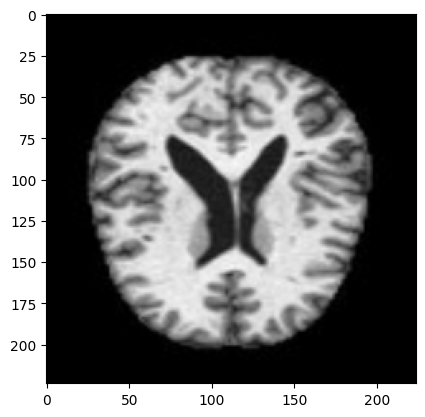

In [11]:
plt.imshow(X[0])

In [12]:
X.shape, y.shape

((6399, 224, 224, 3), (6399,))

In [13]:
# Splitting the data into train, validation and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train)

In [15]:
# Set the number of classes
num_classes = 4  # Adjust based on the actual number of classes in your dataset


In [16]:
# Convert labels to one-hot encoding
y_train_encoded = to_categorical(y_train, num_classes=num_classes)
y_test_encoded = to_categorical(y_test, num_classes=num_classes)


In [17]:
# Define the ResNet block
def resnet_block(x, filters, kernel_size=3, stride=1, conv_shortcut=True):
    shortcut = x
    if conv_shortcut:
        shortcut = Conv2D(filters, kernel_size=1, strides=stride, padding='valid')(shortcut)
        shortcut = BatchNormalization()(shortcut)

    x = Conv2D(filters, kernel_size, strides=stride, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(filters, kernel_size, padding='same')(x)
    x = BatchNormalization()(x)

    x = Add()([x, shortcut])
    x = Activation('relu')(x)
    return x


In [18]:
# Define the ResNet model
def build_resnet(input_shape, num_classes):
    input_tensor = Input(shape=input_shape)
    x = Conv2D(64, 7, strides=2, padding='same')(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(3, strides=2, padding='same')(x)

    # Stack of residual blocks
    num_blocks_list = [3, 4, 6, 3]
    for i, num_blocks in enumerate(num_blocks_list):
        stride = 2 if i > 0 else 1
        x = resnet_block(x, 64 * (2 ** i), stride=stride)
        for _ in range(num_blocks - 1):
            x = resnet_block(x, 64 * (2 ** i))

    # Global average pooling and dense layer
    x = AveragePooling2D(pool_size=7)(x)
    x = Flatten()(x)
    x = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=input_tensor, outputs=x)
    return model


In [19]:
# Build the ResNet model
input_shape = (224, 224, 3)  # Adjust based on your actual image dimensions
resnet_model = build_resnet(input_shape, num_classes)


In [20]:
# Compile the model
resnet_model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


In [26]:
# Train the model
resnet_model.fit(X_train, y_train_encoded, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
77/77 [==============================] - 281s 4s/step - loss: 0.6813 - accuracy: 0.7056 - val_loss: 3.1977 - val_accuracy: 0.2585
Epoch 2/10
77/77 [==============================] - 277s 4s/step - loss: 0.5960 - accuracy: 0.7577 - val_loss: 4.9953 - val_accuracy: 0.2130
Epoch 3/10
77/77 [==============================] - 278s 4s/step - loss: 0.5307 - accuracy: 0.7903 - val_loss: 53.0946 - val_accuracy: 0.1496
Epoch 4/10
77/77 [==============================] - 278s 4s/step - loss: 0.4294 - accuracy: 0.8331 - val_loss: 19.6531 - val_accuracy: 0.1431
Epoch 5/10
77/77 [==============================] - 270s 4s/step - loss: 0.3595 - accuracy: 0.8656 - val_loss: 6.0925 - val_accuracy: 0.3528
Epoch 6/10
77/77 [==============================] - 257s 3s/step - loss: 0.3356 - accuracy: 0.8791 - val_loss: 5.1760 - val_accuracy: 0.3740
Epoch 7/10
77/77 [==============================] - 254s 3s/step - loss: 0.3009 - accuracy: 0.9023 - val_loss: 1.5451 - val_accuracy: 0.6650
Epoch 8/10


In [28]:
# Evaluate the model on the test set
y_pred = resnet_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test_encoded, axis=1)


80/80 [==============================] - 74s 919ms/step


In [40]:
# Calculate and print evaluation metrics
accuracy = accuracy_score(y_true, y_pred_classes)
precision = precision_score(y_true, y_pred_classes, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_true, y_pred_classes)
f1 = f1_score(y_true, y_pred_classes, average='weighted')



ValueError: Classification metrics can't handle a mix of multiclass and continuous-multioutput targets

In [30]:
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"F1 Score: {f1}")

Accuracy: 0.68828125
Precision: 0.6953879950884774
Confusion Matrix:
[[1092  180    8    0]
 [ 305  581    9    0]
 [  85  183   89    2]
 [   6   20    0    0]]
F1 Score: 0.6667191533789772
